# **Preface** :)

> 🟧 Jupyter Notebooks
>
> This interface is called *jupyter notebook* (from now on notebook) and, in this case, it is served within the free tool *Google collab*. Inside this notebook you can write code and text, which makes it perfect for sharing and reporting data analyses. It also allows to download data, insert images or install packages, all within the notebook.


> How to use this notebook?
>
> - You can run the code in each cell by clicking on the run cell sign, when the code finished running a small green check sign will appear on the left side
>
> - You need to run the cells in **sequential order**, please do not run a cell until the one above finished running and do not skip any cells
>
> - Each cell contains a short description of the code and the output you should get. Please try not to focus on understanding what each command line does, as this is not the purpose of the exercise


Now that you know where you are and how to proceed, let's introduce our topic for today - ***ChIP-seq***!

# **ChIP-seq data analysis**

### **What is ChIP-seq?**

ChIP-seq (Chromatin immunoprecipitation followed by high-throughput sequencing ) has become the most used technology for the identification of target sites for DNA-binding proteins.

Below there is a graphical overview of the steps in a ChIP-seq experiment and analysis:

## <center><img src=https://hbctraining.github.io/Intro-to-ChIPseq/img/chipseq_overall.png width="400"> <center>

As the figure shows, the idea is to use an antibody to target our protein of interest and recover the DNA involved in the protein binding. Given that information, we can create a map to visualize and investigate the binding sites (in other words, where the association between DNA and protein happened).

**In this notebook:**

We will be working with 2 transcription factors (which are proteins): TATA-binding protein and NF-YA (Nuclear transcription factor Y subunit alpha). We will try to identify binding sites in the human genome for these 2 transcription factors using a bioinformatic approach.

In [1]:
# Import python packages (for later!)
from IPython.display import Image
from IPython.display import display

### **Download the datasets**

The command lines below will download the raw data you will be working with. The files are stored in a GitHub repository (read more about it here: [GitHub](https://docs.github.com/en/repositories/creating-and-managing-repositories/about-repositories)). You will be working with 2 small ChIP-seq experiments. One library for the TATA-binding protein (TBP) and the other for the NF-YA transcription factor. For the purpose of the exercise we will be using as reference a small portion of the human genome, the first 10 Mbp of Chromosome 1.

In [2]:
#!rm -r sample_data/
! rm -rf data
! git clone https://github.com/adriangeerre/MBG_Exercise.git data

Cloning into 'data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 8.71 MiB | 2.79 MiB/s, done.
Resolving deltas: 100% (2/2), done.



*   You can check the downloaded files on the left panel, by clicking on "Files" tab and navigating to the data folder.
*   Sequenced reads are saved in .fastq files, while the genome data is stored in a .fasta file.

### **Data Analysis**

We will now analyse the data to identify binding sites for our 2 transcription factors.


---


Initial parts of the analysis of sequenced reads include **read alignment, filtering and peak calling**.

> We will use the program called *Bowtie2* to align the reads in the 2 fastq files to our reference sequence (10 Mbp of the human genome). This will help us determine where on the human genome our reads originated from, thus where the transcription factors bind to DNA.

> Afterwards, we will keep only the reads that mapped with high quality to the part of the human genome we are interested in. We will use the samtools program for this step.

> The output will be 2 alignment files (.bam). We will use these files in the next steps.




> 🟧 Read alignment
>
> *Read alignment* is a term that refers to mapping DNA sequences to a reference. This is a computational approach that can vary depending on the parameters given to the algorithms. Moreover, years ago the SAM format was established to report read alignment. Basically, SAM files contain information on where and how a read align to the reference, allowing us to clean and analyse the alignment. The software *Samtools* was developed to handle SAM files, among others.

In [3]:
# Read alignment
! mkdir -p bowtie_index
! bowtie2-build data/NC_000001.11_subset.fasta bowtie_index/Chr1_index > /dev/null

Building a SMALL index
Renaming bowtie_index/Chr1_index.3.bt2.tmp to bowtie_index/Chr1_index.3.bt2
Renaming bowtie_index/Chr1_index.4.bt2.tmp to bowtie_index/Chr1_index.4.bt2
Renaming bowtie_index/Chr1_index.1.bt2.tmp to bowtie_index/Chr1_index.1.bt2
Renaming bowtie_index/Chr1_index.2.bt2.tmp to bowtie_index/Chr1_index.2.bt2
Renaming bowtie_index/Chr1_index.rev.1.bt2.tmp to bowtie_index/Chr1_index.rev.1.bt2
Renaming bowtie_index/Chr1_index.rev.2.bt2.tmp to bowtie_index/Chr1_index.rev.2.bt2


In [4]:
! mkdir -p bowtie2_results
!bowtie2 -q --local \
-x  bowtie_index/Chr1_index \
-U data/TBP_chr1_subset.fastq \
-S bowtie2_results/TBP_chr1.sam

139385 reads; of these:
  139385 (100.00%) were unpaired; of these:
    988 (0.71%) aligned 0 times
    115540 (82.89%) aligned exactly 1 time
    22857 (16.40%) aligned >1 times
99.29% overall alignment rate


In [5]:
! bowtie2 -q --local \
-x bowtie_index/Chr1_index \
-U data/NF-YA_chr1_subset.fastq \
-S bowtie2_results/NF-YA_chr1.sam

43503 reads; of these:
  43503 (100.00%) were unpaired; of these:
    1177 (2.71%) aligned 0 times
    34698 (79.76%) aligned exactly 1 time
    7628 (17.53%) aligned >1 times
97.29% overall alignment rate


In [6]:
# Compress SAM output
! samtools view -q 10 -u bowtie2_results/TBP_chr1.sam | samtools sort -o bowtie2_results/TBP_chr1_sorted.bam
! samtools view -q 10 -u bowtie2_results/NF-YA_chr1.sam | samtools sort -o bowtie2_results/NF-YA_chr1_sorted.bam
! samtools index bowtie2_results/TBP_chr1_sorted.bam
! samtools index bowtie2_results/NF-YA_chr1_sorted.bam

# Question:

Once you run the read alignment, you should be able to see the summary of the alignment process (one per fastq file)

**Q.1: How many reads did each fastq contain?**

TBP = 
NF-YA = 

**Q.2: What was the percentage of reads aligned to the Chromosome 1?**

TBP = 
NF-YA = 

### **Peak calling**

We can now identify binding sites for the transcription factors, these are also called peaks. These are just regions in the genome where a high number of reads are bound, indicating that the region might be a transcription factor binding site.

The identification of peaks is done

> We will use the program macs3 to call peaks for the 2 previously generated alignment files.

## <img src=https://hbctraining.github.io/Intro-to-ChIPseq/img/plos_chipseq_arrow.png width="600">

In [7]:
! mkdir -p macs3_results
! macs3 callpeak -t bowtie2_results/TBP_chr1_sorted.bam -f BAM -g 10000000 --outdir macs3_results/ -m 1 100 -n TBP --verbose 0
! macs3 callpeak -t bowtie2_results/NF-YA_chr1_sorted.bam -f BAM -g 10000000 --outdir macs3_results/ -m 1 100 -n NF-YA --verbose 0

The cell below gives a summary of the number of binding sites identified for each of the 2 transcription factors.


In [8]:
!wc -l macs3_results/*.narrowPeak

   73 macs3_results/NF-YA_peaks.narrowPeak
  244 macs3_results/TBP_peaks.narrowPeak
  317 total



> 🟧 MACS3 output
>
> *Peak Calling* is a complex topic and we are not going to discuss how peaks are identified because it is out of the scope of this exercise. You can find more information [here](https://hbctraining.github.io/Intro-to-ChIPseq/lessons/05_peak_calling_macs.html), if you are interested. Nonetheless, we can have a look at the peak identification output produced by MACS3:


In [9]:
# Visualize MACS3 output (TBP)
! printf "Chromosome\tStart\tEnd\tPeak_Name\tScore\tStrand\tSignal\tPvalue (-log10)\tQvalue (-log10)\tPoint_source\n"
! head -n 3 macs3_results/TBP_peaks.narrowPeak

Chromosome	Start	End	Peak_Name	Score	Strand	Signal	Pvalue (-log10)	Qvalue (-log10)	Point_source
NC_000001.11	10151	10305	TBP_peak_1	61	.	5.53624	8.64948	6.1936	28
NC_000001.11	32667	32809	TBP_peak_2	54	.	4.04945	7.82292	5.41164	91
NC_000001.11	36364	36658	TBP_peak_3	884	.	18.0939	92.6577	88.4997	161


> Let's focus on several columns:
>
> - *Score*: Value for visualization in Genome Browser (higher = darker)
> - *Signal*: Overall enrichment for the region
> - *Pvalue*: Statistical significance; probability of the peak identification
> - *Qvalue*: P-value corrected for False Positives identifactions
> - *Point_Source*: Location of the offset within the peak range
>
> The last 4 columns are specific of MACS3 output while the first 6 columns are obtained from other file type (BED).

In [10]:
# @title # ❓ Question:

#@markdown **Q.3: Are the number of peaks identified for TBP and NF-YA similar?**

Answer = "" #@param {type:"string"}

### **IGV genome browser**

> 🟧 Genome browser
>
> *Genome browser* is a term that describes a website or program that allows to visualize data associated to a genome (for example, read alignments). A well known web is the [USCS](https://cirm.ucsc.edu/index) and a widely used software is the [IGV](https://software.broadinstitute.org/software/igv/) (or Integrative Genome Viewer).


We will now download all the data generated so far and upload it to a genome browser, to visualize the mapped reads and the binding sites for the transcription factors.

> Run the cell below and pick a place on your computer where to save the *.zip* file. Find the file on your computer and extract the archive. You should have a folder named **IGV_files**, which contains 6 files.


In [11]:
#Files for IGV
! mkdir -p IGV_files
! cp bowtie2_results/NF-YA_chr1_sorted.bam IGV_files/NF-YA_chr1_sorted.bam
! cp bowtie2_results/NF-YA_chr1_sorted.bam.bai IGV_files/NF-YA_chr1_sorted.bam.bai
! cp bowtie2_results/TBP_chr1_sorted.bam IGV_files/TBP_chr1_sorted.bam
! cp bowtie2_results/TBP_chr1_sorted.bam.bai  IGV_files/TBP_chr1_sorted.bam.bai
! cp macs3_results/NF-YA_peaks.narrowPeak IGV_files/NF-YA_peaks.narrowPeak
! cp macs3_results/TBP_peaks.narrowPeak IGV_files/TBP_peaks.narrowPeak

! zip -r IGV_files.zip IGV_files
# from google.colab import files
# files.download("IGV_files.zip")

  adding: IGV_files/ (stored 0%)
  adding: IGV_files/NF-YA_peaks.narrowPeak (deflated 63%)
  adding: IGV_files/TBP_chr1_sorted.bam (deflated 0%)
  adding: IGV_files/NF-YA_chr1_sorted.bam.bai (deflated 69%)
  adding: IGV_files/TBP_peaks.narrowPeak
zip warning: No such file or directory
	zip warning: could not open for reading: IGV_files/TBP_peaks.narrowPeak
  adding: IGV_files/NF-YA_chr1_sorted.bam (deflated 0%)
  adding: IGV_files/TBP_chr1_sorted.bam.bai (deflated 62%)

zip warning: Not all files were readable
  files/entries read:  6 (5.5M bytes)  skipped:  1 (17K bytes)



> Open the link: https://igv.org/app/

> Click on the "Tracks" tab and then on "Local file...". Navigate to the place where you saved the "IGV_files" folder on your computer and pick all 6 files in the folder. Click open.

## <img src=https://raw.githubusercontent.com/adriangeerre/MBG_Exercise/main/IGVapp_explained.png width="600">

> **Remember we are only working with the first 10 Mbp of Chromosome 1, Zoom in on that region.** Do this by using the right-most white box, in the second row below *Session*. For example, *chr4:1-1,000* would show the first thousand bps of Chromosome 4.

> Once you have load and adjust the view, you can visualize the ChIP-seq peaks in the genome (called by macs3) and the gene annotations. In order to visualize the reads, you need to zoom in (at the top right of the website or by double clicking on top of a track). The aligned ChIP-seq reads are represented by horizontal grey arrows. On top of the arrow, a coverage barplot is shown.

> Below, the "*Refseq Genes*" track, blue color bars, represent the genes and their position.

In [12]:
# @title ❓ Question:

#@markdown You should see two tracks, one for TBP and one for NF-YA. Try to identify some of the putative binding sites (regions with a high number of aligned reads) for the transcription factors

#@markdown **Q.4: Do the identified peaks correspond to large number of aligned reads? Take a few screenshots that prove your answer**

Answer = "" #@param {type:"string"}

Of course, it is not feasible to check all peaks manually and we do not want to bias all decisions. Therefore, we will now computationally analyse the peaks in order to compare the binding sites for TBP and NF-YA transcription factors using the package **ChIPseeker**.

### **ChIPseeker package in R**

An R script has already been created and it is stored in: data/RScript.R
You can visualize the content of the script by running the cell below.
First, the necessary R packages and the files we previously generated using the macs3 program are loaded. Next, we use commads specific to the ChiPseeker package to generate figures that will help you make a comparison between the two transcription factors we are analysing.

You can easily run the R script using the following command line. It will save four plots in the files folder. We will analyze each of the plots created.

In [13]:
import rpy2
%load_ext rpy2.ipython
#%Rdevice svg

/miniconda/lib/python3.8/site-packages/rpy2/ipython/rmagic.py:74: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded (error: No module named 'pandas'), but at least we found `numpy`.
  warnings.warn('The Python package `pandas` is strongly '


In the IGV browser, you visualized the aligned reads and peaks by zooming in over small regions of the reference sequence.

Now, we would like to look at an overview of the peak locations over our entire reference region, 10 MBp from the Chromosome 1 in the human genome.
We can do this by generating a coverage plot.



<details>
<summary>Code explainer</summary>

The following command lines were used to generate the plots:

    covplot(samplefiles`$`TBP, weightCol="V5",title = "ChIP Peaks over region - TBP")

    covplot(samplefiles`$`NF_YA, weightCol="V5", title = "ChIP Peaks over region - NF-YA")

</details>

In [23]:
%%R -w 50 -h 10 -u cm -r 50

.libPaths(c("/opt/conda/lib/R/library/", .libPaths())) 
suppressMessages(library(cowplot))
suppressMessages(library(ggplot2))
suppressMessages(library(ChIPseeker))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

TBP <- read.delim("macs3_results/TBP_summits.bed", header=F)
TBP$V1 <- "chr1"
NF_YA <- read.delim("macs3_results/NF-YA_summits.bed", header=F)
NF_YA$V1 <- "chr1"
write.table(TBP, "macs3_results/TBP_renamed.bed", sep="\t", row.names=F, col.names=F, quote=F)
write.table(NF_YA, "macs3_results/NF-YA_renamed.bed", sep="\t", row.names=F, col.names=F, quote=F)
samplefiles <- list("macs3_results/TBP_renamed.bed", "macs3_results/NF-YA_renamed.bed")
names(samplefiles) <- c("TBP", "NF_YA")
p1<- covplot(samplefiles$TBP, weightCol="V5", title = "ChIP Peaks over region - TBP")
suppressMessages(ggsave("covplot_TBP.png", plot = p1, width=20, height=5, dpi=300))
p2 <- covplot(samplefiles$NF_YA, weightCol="V5", title = "ChIP Peaks over region - NF-YA")
suppressMessages(ggsave("covplot_NFYA.png", plot = p2, width=20, height=5, dpi=300))

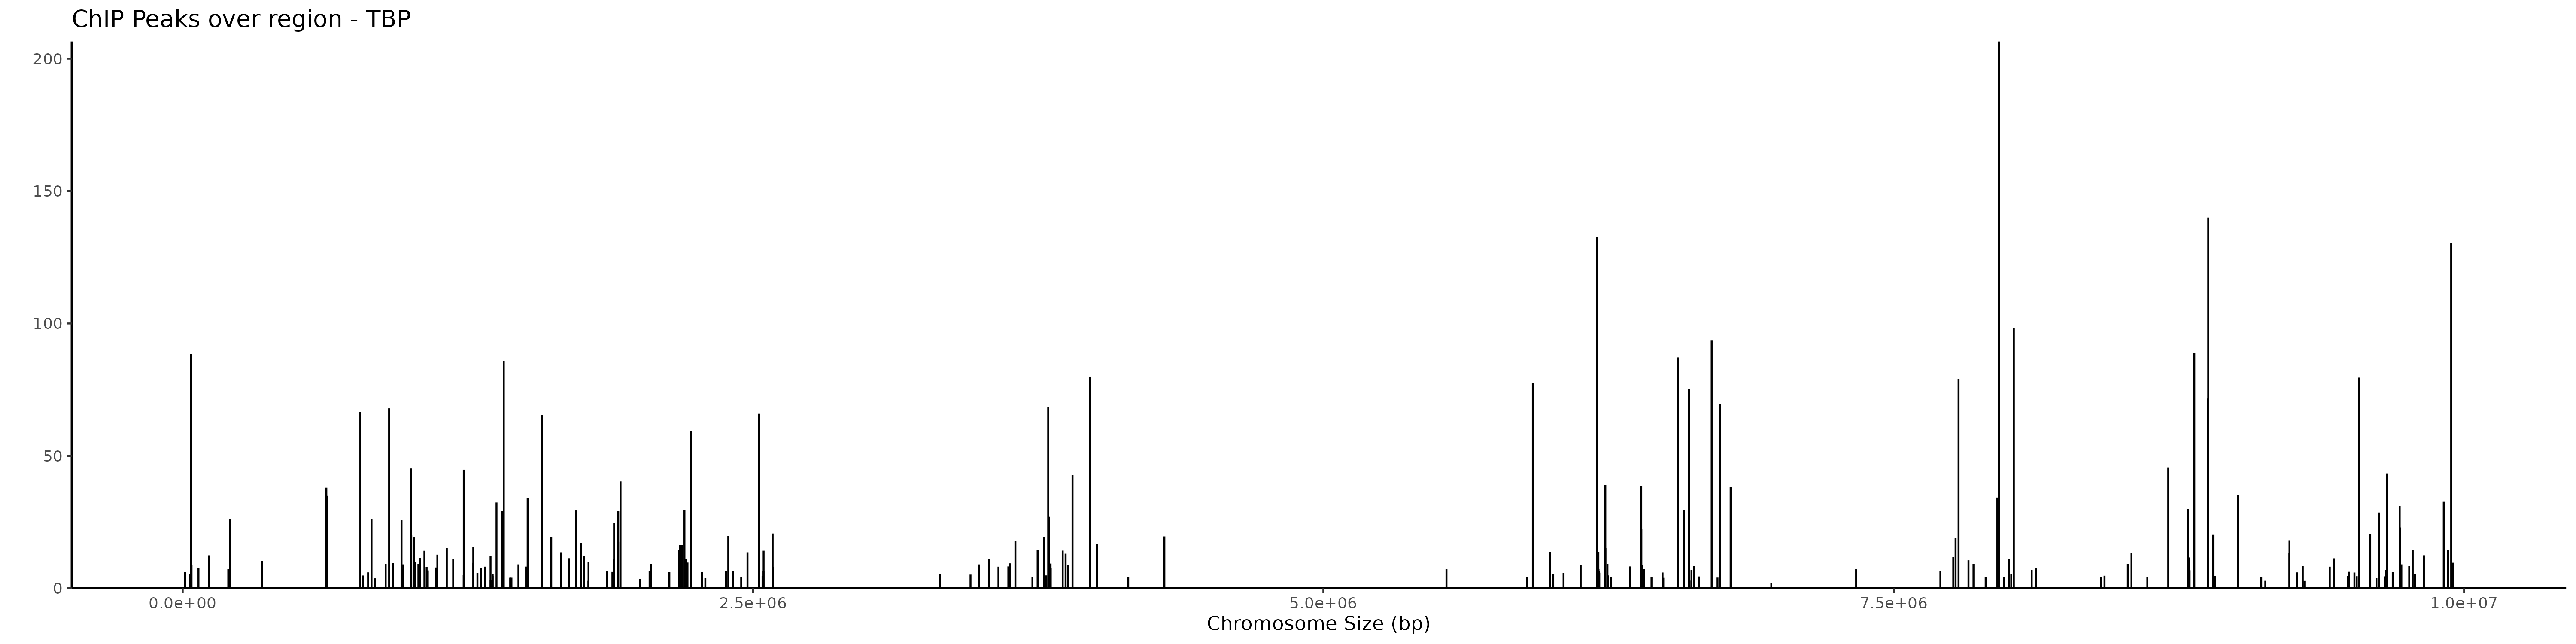

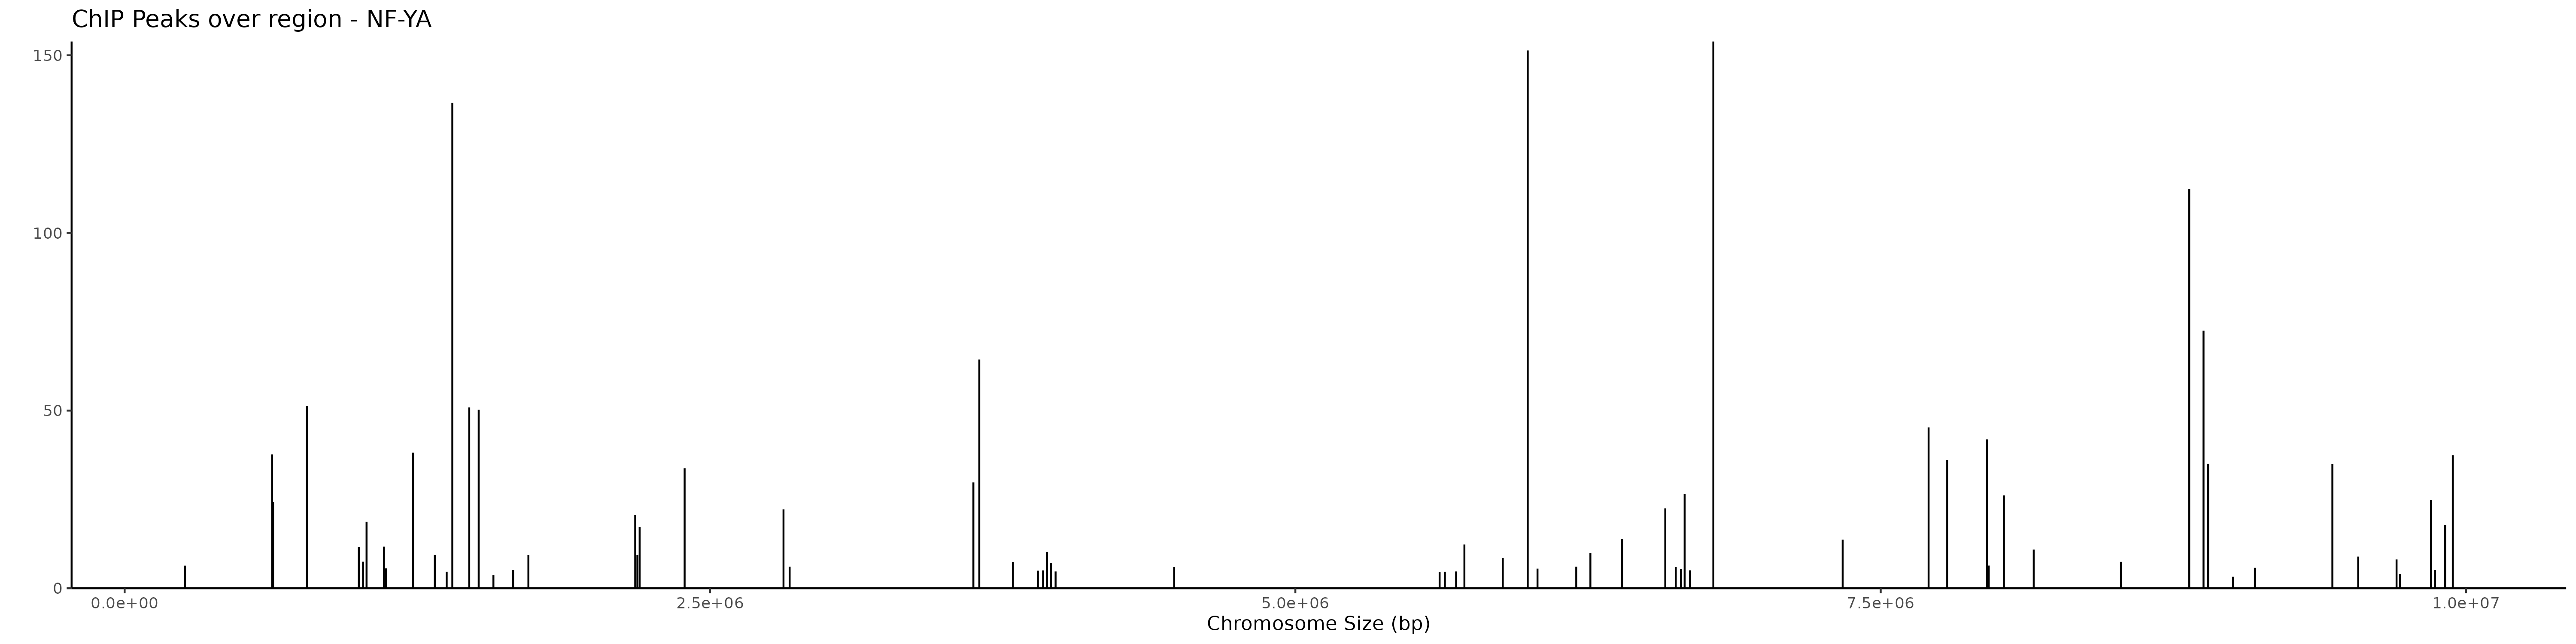

In [18]:
display(Image("covplot_TBP.png", height=200, width=800), Image("covplot_NFYA.png", height=200, width=800))

Each vertical line represents a binding site for the transcription factors. The height of the bar represents the number of reads mapped to that specific region (Be aware that the plots have different y-axis scales).

 You can observe that TBP has many more called peaks than compared to NF-YA.

We can next identify the regions to which the transcription factors bind, in terms of genomic features(Promoter, intron, exon etc.).

FYI: The command lines for creating the plot:
> peakAnnoList <- lapply(samplefiles, annotatePeak, TxDb=txdb,
                       tssRegion=c(-3000, 3000), verbose=FALSE)
> plotAnnoBar(peakAnnoList)

In [19]:
%%R
peakAnnoList <- lapply(samplefiles, annotatePeak, TxDb=txdb, 
                       tssRegion=c(-3000, 3000), verbose=FALSE)
p3 <-plotAnnoBar(peakAnnoList)
suppressMessages(ggsave("plotAnnoBar.png", plot = p3))

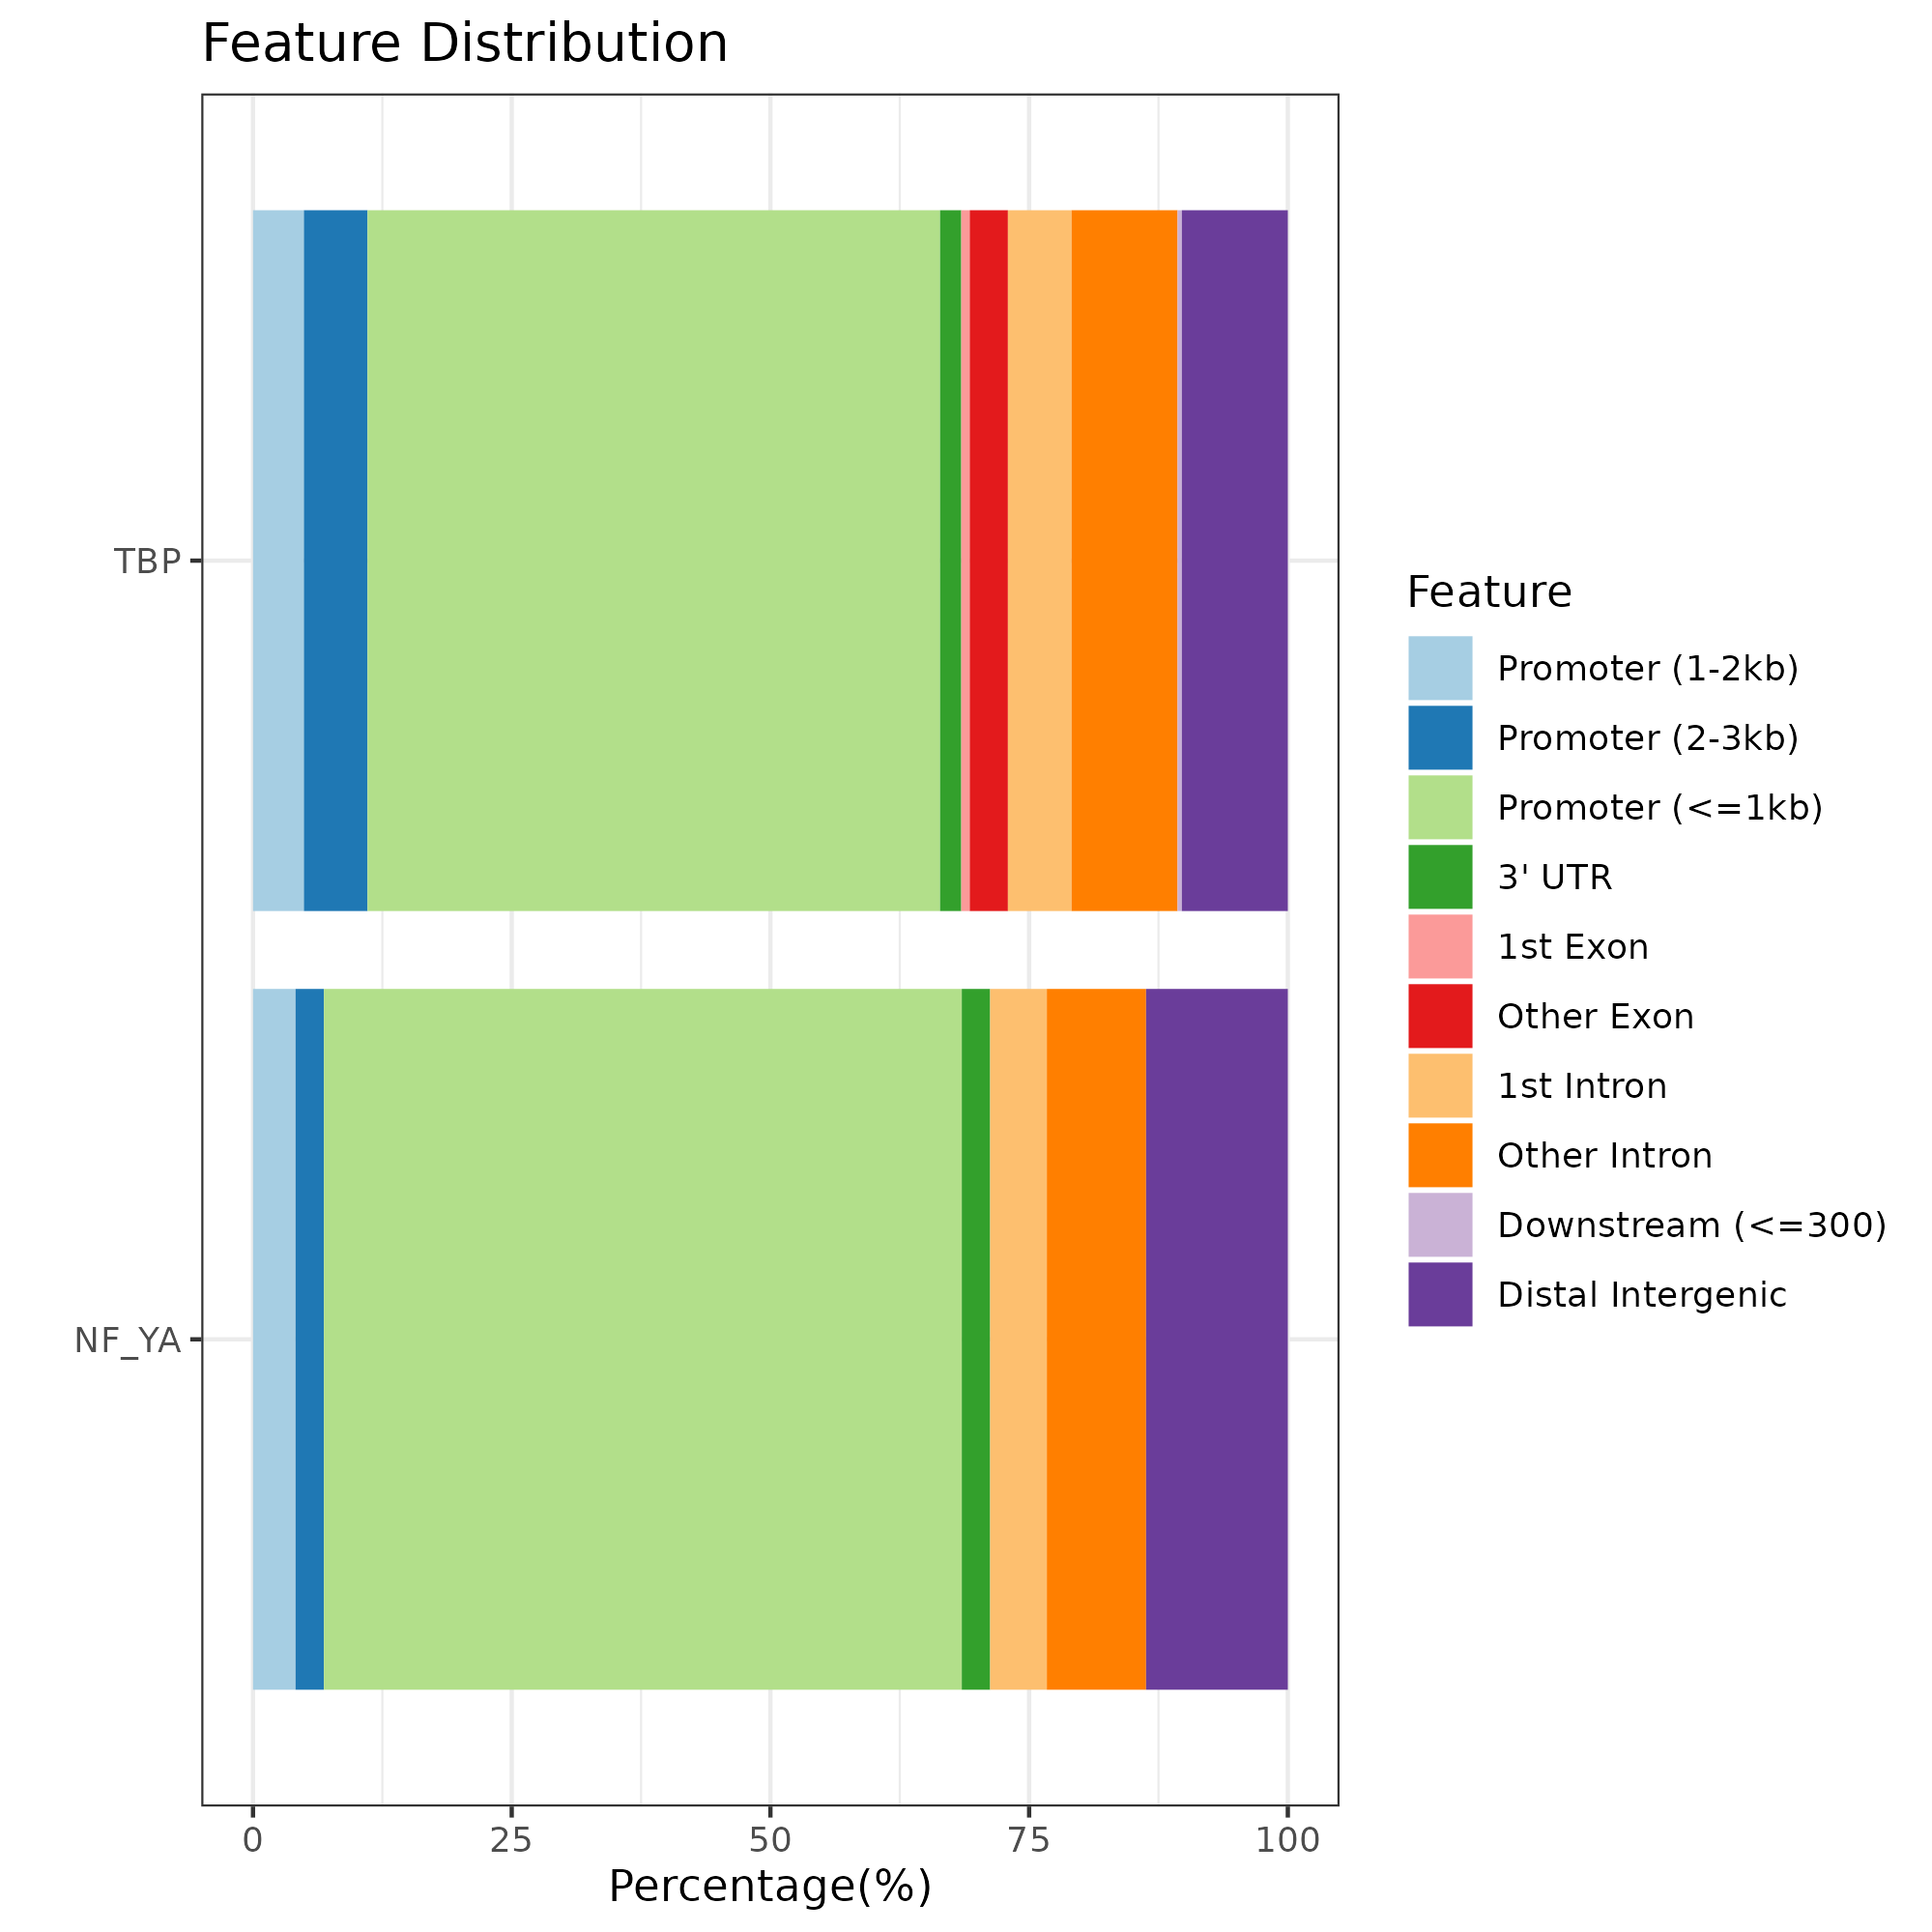

In [20]:
display(Image("plotAnnoBar.png", width=600, height=600))

As expected a high proportion of the binding sites is located in the **promoter regions**, but we also identified binding sites in other regions of the genes and also in the intergenic regions.


We've seen that TBP binds to many more sites compared to NF-YA, but let's find out how many binding sites are common for the 2 transcription factors.

FYI the script for creating the Venn diagram:

> genes= lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)

> vennplot(genes)

In [21]:
%%R
genes = lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
png("vennplot.png")
vennplot(genes)
trash <- dev.off()

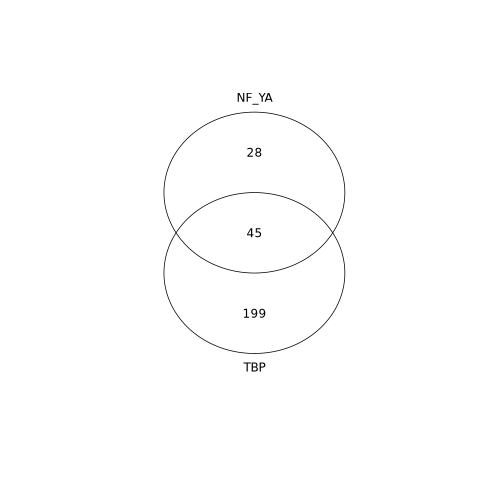

In [22]:
x= Image("vennplot.png", width=600) ; display(x)

### **Summary**

In this notebook you have:

1. Download data from a GitHub repository
2. Align ChIP-seq reads for two different transcription factor to the Human Chromosome 1
3. Call peaks using the read coverage signal
4. Visualize the read coverage of the peaks
5. Identify the regions where the transcription factors bind to the DNA
6. Compare the genes at the binding regions between the transcription factors

🎉🎉🎉 Well done!!